In [2]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt

%matplotlib inline

In [23]:
# data is big so not upload to db2
df_rejected = pd.read_csv('../datasets/lending-club-loan-v2/rejected_2018.csv', parse_dates=['issue_d'], infer_datetime_format=True, low_memory=False)
df_approved = pd.read_csv('../datasets/lending-club-loan-v2/approved_2018.csv', parse_dates=['issue_d'], infer_datetime_format=True, low_memory=False)

In [24]:
df_rejected = df_rejected[df_rejected.issue_d >= '2016-01-01 00:00:00']
df_approved = df_approved[df_approved.issue_d >= '2018-01-01 00:00:00']

## 1. Preprocessing

In [26]:
from datetime import datetime

def transform_issue_d(value):
    return datetime.strptime('01-'+str(value), '%d-%b-%y')

df_approved['issue_d'] = df_approved['issue_d'].apply(transform_issue_d)

In [27]:
df_rejected['issue_d'] = pd.to_datetime(df_rejected['issue_d']).dt.strftime('%d-%b-%y')
df_approved['issue_d'] = pd.to_datetime(df_approved['issue_d']).dt.strftime('%d-%b-%y')

In [28]:
df_rejected['application_label'] = 'rejected'
df_approved['application_label'] = 'approved'

In [29]:
df_backup = df_approved.copy()

In [30]:
df_backup.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,application_label
0,68407277,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,10+ years,...,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N,approved
1,68355089,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,10+ years,...,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N,approved
2,68341763,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,10+ years,...,0.0,0.0,218418.0,18696.0,6200.0,14877.0,N,Cash,N,approved
3,66310712,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,10+ years,...,0.0,0.0,381215.0,52226.0,62500.0,18000.0,N,Cash,N,approved
4,68476807,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,3 years,...,0.0,0.0,439570.0,95768.0,20300.0,88097.0,N,Cash,N,approved


In [31]:
df_approved = df_approved[['id'] + list(df_rejected.columns)]

In [32]:
df_rejected['id'] = [i for i in range(len(df_rejected))]

In [33]:
df_rejected = df_rejected[df_approved.columns]

In [34]:
df_combined = df_rejected.append(df_approved)

In [35]:
def transform_emp_length(value):
    try:
        if '10+' in value:
            return 10
        elif '< 1' in value:
            return 0.5
        else:
            return int(value[0])
    except:
        return 0
df_combined['emp_length'] = df_combined['emp_length'].apply(transform_emp_length)

In [36]:
def transform_dti(value):
    value = str(value)
    value = value.replace('%','')
    try:
        value = float(value)
    except:
        value = 0
    return value


df_combined['dti'] = df_combined['dti'].apply(transform_dti)

In [37]:
df_combined['fico_range_low'] = df_combined['fico_range_low'].fillna(0)

In [38]:
def transform_purpose(value):
    if value in ['debt_consolidation', 'credit_card','medical', 'house', 'car', 'small_business', 'other']:
        return value
    else:
        return 'personal'

df_combined['purpose'] = df_combined['purpose'].apply(transform_purpose)

In [39]:
df_combined.to_csv('../datasets/lending-club-loan-v2/application-approved-rejected.csv', index=False)

## Import dataset

In [3]:
df_combined = pd.read_csv('../datasets/lending-club-loan-v2/application-approved-rejected.csv')

In [4]:
df_combined

,id,loan_amnt,issue_d,purpose,fico_range_low,dti,zip_code,addr_state,emp_length,policy_code,application_label
0,0,1000.0,01-Apr-16,other,0.0,2.69,331xx,FL,0.5,0.0,rejected
1,1,4000.0,01-Apr-16,debt_consolidation,0.0,28.26,834xx,ID,0.5,0.0,rejected
2,2,5000.0,01-Apr-16,personal,0.0,-1.00,648xx,MO,0.0,0.0,rejected
3,3,1000.0,01-Apr-16,personal,628.0,21.43,380xx,TN,0.5,0.0,rejected
4,4,3000.0,01-Apr-16,personal,0.0,8.49,895xx,NV,2.0,2.0,rejected
...,...,...,...,...,...,...,...,...,...,...,...
1341642,72663394,14400.0,01-Feb-16,credit_card,675.0,33.76,168xx,PA,10.0,1.0,approved
1341643,72673678,10000.0,01-Feb-16,debt_consolidation,665.0,26.41,985xx,WA,10.0,1.0,approved
1341644,72663353,16000.0,01-Feb-16,debt_consolidation,710.0,21.67,284xx,NC,0.5,1.0,approved
1341645,72785737,6000.0,01-Feb-16,debt_consolidation,715.0,25.98,394xx,MS,6.0,1.0,approved


In [5]:
df_combined.drop(['id', 'issue_d', 'addr_state', 'zip_code', 'policy_code'], axis=1, inplace=True)

## 2. Split training test

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [7]:
le = LabelEncoder()

In [39]:
X = df_combined.drop('application_label', axis=1)
y = le.fit_transform(df_combined['application_label'])
X.fillna(0, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

## 3.1. Run Boolean Rule Column Generation (BRCG)

To get a better understanding on how the Lending Club approve/reject the application, we use Boolean Rule Column Generation to create rules for that. This might help us identify which features that are significant in distinguishing rejected and approved loan application.

In [9]:
from aix360.algorithms.rbm import FeatureBinarizer
fb = FeatureBinarizer(negations=True, returnOrd=True)

In [10]:
X_train, X_trainStd = fb.fit_transform(X_train)
X_test, X_testStd = fb.transform(X_test)

/home/jupyter-ariff/.local/lib/python3.7/site-packages/aix360/algorithms/rbm/features.py:154: RuntimeWarning: invalid value encountered in less_equal
  Anew = (data[c].values[:, np.newaxis] <= thresh[c]).astype(int)
/home/jupyter-ariff/.local/lib/python3.7/site-packages/aix360/algorithms/rbm/features.py:154: RuntimeWarning: invalid value encountered in less_equal
  Anew = (data[c].values[:, np.newaxis] <= thresh[c]).astype(int)


In [11]:
from aix360.algorithms.rbm import BooleanRuleCG
br = BooleanRuleCG(lambda0 = 0.001, lambda1 = 0.001, CNF=True)

In [12]:
le.classes_

array(['approved', 'rejected'], dtype=object)

In [13]:
br.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
print('Training accuracy:', accuracy_score(y_train, br.predict(X_train)))
print('Test accuracy:', accuracy_score(y_test, br.predict(X_test)))
print('Predict Y=0 [Approved] if ANY of the following rules are satisfied, otherwise Y=1 [Rejected]:')
print(br.explain()['rules'])

Learning CNF rule with complexity parameters lambda0=0.001, lambda1=0.001
Initial LP solved
Iteration: 1, Objective: 0.0204
Iteration: 2, Objective: 0.0204
Iteration: 3, Objective: 0.0204
Iteration: 4, Objective: 0.0204
Training accuracy: 0.9815520231357486
Test accuracy: 0.9814705496523678
Predict Y=0 [Approved] if ANY of the following rules are satisfied, otherwise Y=1 [Rejected]:
['fico_range_low > 645.00']


In [26]:
import joblib

joblib.dump(value=br, filename='boolean-rule-model.pkl')

['boolean-rule-model.pkl']

## 3.2. Run Logistic Rule Regression (LogRR)

LogRR fits a logistic regression model using rule-based features, where column generation is again used to generate promising candidates from the space of all possible rules. Here we are also including unbinarized ordinal features (useOrd=True) in addition to rules.

In [14]:
# Instantiate LRR with good complexity penalties and numerical features
from aix360.algorithms.rbm import LogisticRuleRegression
lrr = LogisticRuleRegression(lambda0=0.005, lambda1=0.001, useOrd=True)

# Train, print, and evaluate model
lrr.fit(X_train, y_train, X_trainStd)
print('Training accuracy:', accuracy_score(y_train, lrr.predict(X_train, X_trainStd)))
print('Test accuracy:', accuracy_score(y_test, lrr.predict(X_test, X_testStd)))
print('Probability of Y=1 is predicted as logistic(z) = 1 / (1 + exp(-z))')
print('where z is a linear combination of the following rules/numerical features:')
lrr.explain()

/home/jupyter-ariff/.local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Training accuracy: 0.9820688010256053
Test accuracy: 0.9817627276304962
Probability of Y=1 is predicted as logistic(z) = 1 / (1 + exp(-z))
where z is a linear combination of the following rules/numerical features:


,rule/numerical feature,coefficient
0,(intercept),2.37508
1,fico_range_low <= 645.00,13.0954
2,fico_range_low,-6.36125
3,fico_range_low > 645.00 AND emp_length > 0.50,-4.5325
4,fico_range_low > 645.00 AND dti <= 34.37,-2.82816
5,purpose != personal AND fico_range_low > 645.00,-2.10275
6,loan_amnt <= 19950.00 AND fico_range_low > 645.00,-1.27639
7,fico_range_low <= 665.00,0.80415


In [27]:
joblib.dump(value=lrr, filename='logistic-rule-model.pkl')

['logistic-rule-model.pkl']

### Fico Score

As highlighted from the rules created by BRCG, FICO Score is an important feature identifying whether the loan is going to be rejected or not.

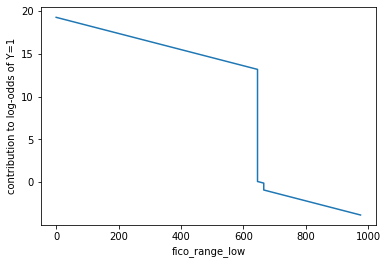

In [15]:
lrr.visualize(df_combined, fb, ['fico_range_low']);

After getting the information on what features are significant in deciding the loan application, we may need to know on what aspects that the borrower who are rejected need to know to improve their chances on getting the loan.